## Covid-19 small data set
### The data used here is till 29-April-2020 and has record as on 29-April-2020

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("4. covid_19_data.csv")

In [3]:
data.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [6]:
data.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [8]:
data.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

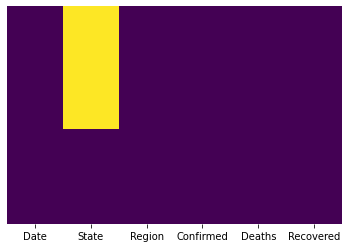

In [16]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

### Show the number of confirmed, Deaths and Recovered cases in each region

In [21]:
data.groupby('Region').sum().head(20)

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7
Antigua and Barbuda,24,3,11
Argentina,4285,214,1192
Armenia,1932,30,900
Australia,6752,91,5715


In [26]:
data.groupby("Region")['Confirmed'].sum().sort_values(ascending=False).head(10)

Region
US                1039909
Spain              236899
Italy              203591
France             166543
UK                 166441
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82862
Name: Confirmed, dtype: int64

### Remove all the records where confirmed cases is less than 10

In [29]:
data = data[~(data.Confirmed < 10)] #to remove the records satisfying a condition

In [30]:
data

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


### In which region, max number of confirmed cases were recorded?

In [35]:
data.groupby("Region")["Confirmed"].sum().sort_values(ascending=False)

Region
US            1039909
Spain          236899
Italy          203591
France         166536
UK             166432
               ...   
Seychelles         11
Burundi            11
Suriname           10
Gambia             10
Holy See           10
Name: Confirmed, Length: 180, dtype: int64

### In which region, min number of death cases were recorded?

In [36]:
data.groupby("Region")["Deaths"].sum().sort_values(ascending=True)

Region
Cambodia                        0
Seychelles                      0
Saint Lucia                     0
Central African Republic        0
Saint Kitts and Nevis           0
                            ...  
France                      24121
Spain                       24275
UK                          26165
Italy                       27682
US                          60967
Name: Deaths, Length: 180, dtype: int64

### How many confirmed, deaths & recoverd cases were reported from Sri Lanka till 29th april 2020

In [38]:
data[data.Region == "Sri Lanka"]

,Date,State,Region,Confirmed,Deaths,Recovered
154,4/29/2020,NaN,Sri Lanka,649,7,136


### Sort the entire data > No. of confirmed cases in asc oder

In [41]:
data.sort_values(by=["Confirmed"], ascending=True).head()

,Date,State,Region,Confirmed,Deaths,Recovered
156,4/29/2020,NaN,Suriname,10,1,8
70,4/29/2020,NaN,Holy See,10,0,2
59,4/29/2020,NaN,Gambia,10,1,8
318,4/29/2020,Yukon,Canada,11,0,0
217,4/29/2020,Greenland,Denmark,11,0,11


### Sort the entire data > No. of Recovered cases in desc oder

In [43]:
data.sort_values(by=["Recovered"], ascending=False).head()

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
229,4/29/2020,Hubei,Mainland China,68128,4512,63616
